<a href="https://colab.research.google.com/github/Kat-ies/Coursework/blob/faster_rcnn/face_datection/Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!git clone https://github.com/Kat-ies/Coursework.git
!git clone --single-branch --branch faster_rcnn https://github.com/Kat-ies/Coursework.git
%cd Coursework/src
%run for_google_drive.py

# **Retrain Faster-RCNN**

Здесь будет небольшой рассказ про основную идею: поработать с Faster-RCNN. А точнее указание, что для начала мы возьмём предобученную модель и дообучим на своих данных (с указанием размера выборки, настроек inetunning и тд..).

In [2]:
from face_detection.retrain_model import retrain_model
retrain_model()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth



Epoch: [0]  [  0/998]  eta: 0:33:34  lr: 0.000001  loss: 2.0778 (2.0778)  loss_classifier: 0.8485 (0.8485)  loss_box_reg: 0.1740 (0.1740)  loss_objectness: 0.7345 (0.7345)  loss_rpn_box_reg: 0.3208 (0.3208)  time: 2.0186  data: 0.1143  max mem: 2509
Epoch: [0]  [100/998]  eta: 0:10:06  lr: 0.000051  loss: 1.0611 (1.2158)  loss_classifier: 0.2818 (0.3525)  loss_box_reg: 0.2602 (0.2233)  loss_objectness: 0.2190 (0.3724)  loss_rpn_box_reg: 0.1579 (0.2677)  time: 0.6984  data: 0.0585  max mem: 6428
Epoch: [0]  [200/998]  eta: 0:08:47  lr: 0.000101  loss: 1.1542 (1.1624)  loss_classifier: 0.2834 (0.3156)  loss_box_reg: 0.5259 (0.3354)  loss_objectness: 0.1237 (0.2904)  loss_rpn_box_reg: 0.1872 (0.2210)  time: 0.6546  data: 0.0448  max mem: 10029
Epoch: [0]  [300/998]  eta: 0:07:44  lr: 0.000151  loss: 0.7172 (1.0109)  loss_classifier: 0.1969 (0.2768)  loss_box_reg: 0.3480 (0.3208)  loss_objectness: 0.1450 (0.2347)  loss_rpn_box_reg: 0.0373 (0.1786)  time: 0.6845  data: 0.0526  max mem: 100

# **Test retrained model**

Здесь будет рассказ про mean average precision + выводы

AP: 0.390445567360395
total positives: 13124
total TP: 6045.0
total FP: 53226.0


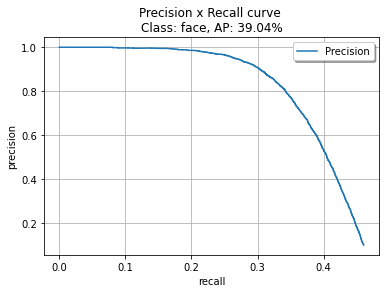

In [3]:
from face_detection.visualization import show_retrain_results

show_retrain_results()

# **Examples**

Какие-нибудь слова про то, что "а давайте посмотрим на работу сетки в действии на авторских примерах".




## что-то мне не нравится Адам.... уж слишком много лишнего нашлось..

а вот если поставить threshold=0.5, то всё становится сильно лучше (но сначала покажу первый вариант, типо "всё, что нашлось")

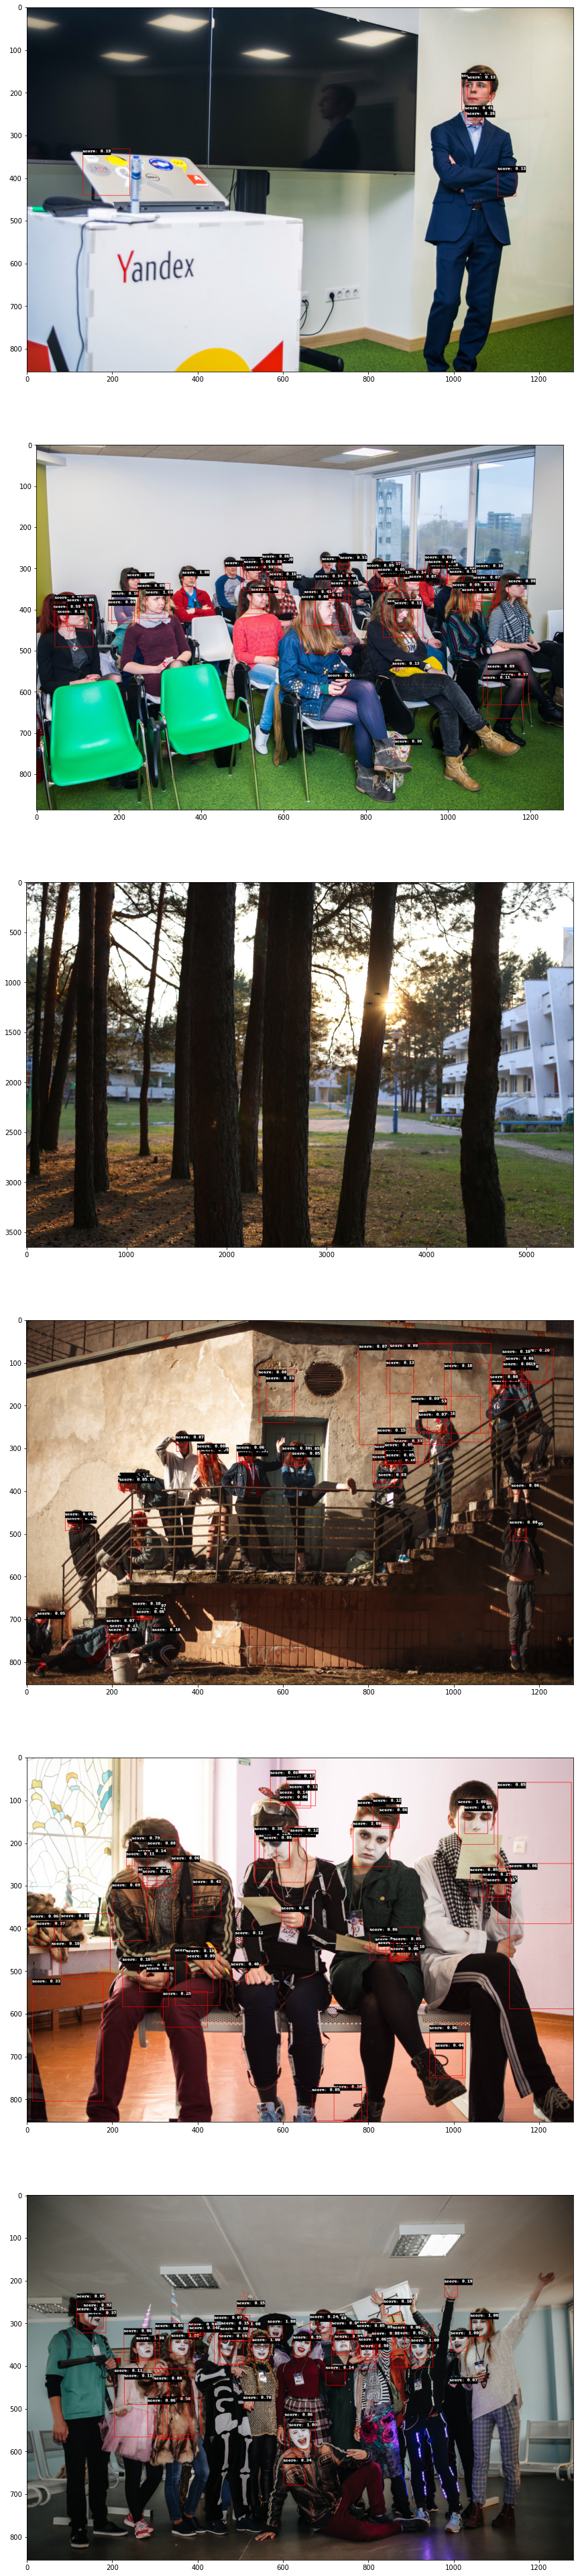

In [6]:
from face_detection.visualization import show_image_examples

show_image_examples(threshold=0)

# **Немного выводов**
### (и интересных фактов)

мне не нравится то, как Адам рисует рамочки. Их слишком много. Как-то SGD в визуализации лучше себя показал. 
Да и по метрике у него было 37%, что не сильно хуже.

**Важный пункт, про который надо не забыть** : нужно понять, из-за чего получаются недетерминированные результаты, я вроде параметры зафиксировала (когда я запустида Adam-а в первый раз, то точность была 38%, когда перезапустила с новыми файлами - 4.7%, потом 40 а теперь 39%, ыыыыыыыыыы)

Вывод: на данном этапе мне кажется, что достигнутая точность так себе, но добиться лучших результатов пока что не позволяют ресурсы :(

А ещё у меня график какой-то очень гладкий. В примере на гитхабе кривая была другой. Немного подозрительно, надо будет подумать над этим, мб я что-то не так сделала.

# **Пока не придумала название**

А здесь будет место, где пользователь может самостоятельно загрузить любое изображение и посмотреть на результат. (Вообще было бы прикольно сделать API-шку, где был бы какой-нибудь базовый интерфейс, позволяющий поиграться с сетками. Если вдруг у меня останется время, то я бы повыпендривалась таким интересным "приложением":) ).

P.S. На данный момент этот блок не работает, тк у меня почему загружается не весь файл, а лишь 141 байт из 158 мб :(

In [ ]:
import os
import requests
from constants import *


def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params={'id': id}, stream=True)
    token = get_confirm_token(response)

    if token:
        params = {'id': id, 'confirm': token}
        response = session.get(URL, params=params, stream=True)

    save_response_content(response, destination)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None


def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk:  # filter out keep-alive new chunks
                f.write(chunk)


In [ ]:
model_name = 'faster-rcnn'

# ну почему оно работает не так, как я хочу :((
download_file_from_google_drive(id, os.path.join(MODEL_PATH, model_name + '.pth'))


In [ ]:
from google.colab import files
from PIL import Image
from face_detection.transforms import test_transforms


def predict_for_user():

    download_file_from_google_drive(id, os.path.join(MODEL_PATH, model_name + '.pth'))
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model = get_object_detection_model()
    model.to(device)
    model.load_state_dict(os.path.join(MODEL_PATH, model_name + '.pth'))
    model.eval()
    
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    image = Image.open(files.upload())
    img = test_transforms(image)


    with torch.no_grad():
        prediction = model([img.to(device)])
    
    show_predictions(image, prediction)

In [ ]:
predict_for_user()

# **Планы на будущее**

*(я больше писала это для себя, чтобы ничего не забыть, но вдруг вам тоже будет интересно :) ).*

План А на ближайщее будущее:

1. Добавить тестовую выборку, чтобы можно было понять, насколько хорошо обучилась модель, нужно ли пытаться увеличить объём обучающей выборки и тд... (+)

2. Провернуть то же самое для `RetinaNet` и метода Виолы-Джонса (реализация в cv)

3. Придумать, как это всё красиво структурировать, чтобы это было похоже на красивый проект, а не на рандомные куски кода.

План В (выполнять после плана А):

0. Обучить `Faster RCNN` и `RetinaNet` с 0. Можно взять готовые модели с параметром `pretrained=False` или посмотреть, какие там слои ( вроде как эта информация общедоступна) и прописать их явно. Может я не права, но оба способа выглядят, как одно и то же. 

1. (???) Построить свой метод Виолы-Джонса, используя классификатор из прошлой работы (Звучит как план энтузиаста, но наверное это реально сделать)

2. Сравнить результаты с нейронками из плана А.

3. Построить красивый визуал. Идея: взять пару картинок и прогнать каждое изображение через все сетки и вывести, чтобы посмотреть, как сетки справились с детекцией (таблицы с чиселками - это круто и очень по-научному, но как показал последний опыт, людям намного интереснее смотреть красивые картинки, чем таблички с кучей цифр:) ).


4. Убедиться, что всё работает, как надо, и раснести весь код по файлам, а в ноутбука оставить только визуал + таблички и прочие интересности.

5. Наслаждаться проделанной работой :)

# Ещё планы, чтобы не забыть:

1. Поиграться с transform   

2. не загружать датасет в оперативку. Вместо этого один раз отдельно всё загрузить, поделить на train и test, и сохранить в таком виде. (*пыталась сделать, но файлы весят по несколько гигов и на гугл-диск не влазят :(*  )


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Apr  4 22:51:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------